# Quality

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os

## Load Data

In [2]:
df = pd.read_csv("../results/quality/results.csv")

In [3]:
df["algorithm_alias"] = df.algorithm

In [4]:
df = df[~(df.algorithm == "S2G++20p-KDE")]

### Merge results

In [5]:
s2g_df = pd.read_csv("../results/optimized-quality.csv")
s2g_df["algorithm"] = "S2G++20p-KDE"

In [6]:
df = pd.concat([df, s2g_df], ignore_index=True)

In [7]:
df.loc[df.algorithm == "S2G++20p-MeanShift", "algorithm_alias"] = "S2G++ (MeanShift)"

In [8]:
df.loc[df.algorithm == "S2G++20p-KDE", "algorithm_alias"] = "S2G++ (KDE)"

In [9]:
df["dataset_name"] = df.dataset.apply(lambda ds: ds.split(".")[0])

In [10]:
import re
df["channels"] = df.dataset.apply(lambda ds: int(re.search(r"(\d+)", ds).groups()[0]))

## Plot

In [11]:
sns.set(rc={"figure.figsize":(20, 10)})

In [12]:
algorithms = ["S2G++ (KDE)", "mSTAMP", "DBStream", "k-Means", "LSTM-AD", "Normalizing Flows", "Torsk"]

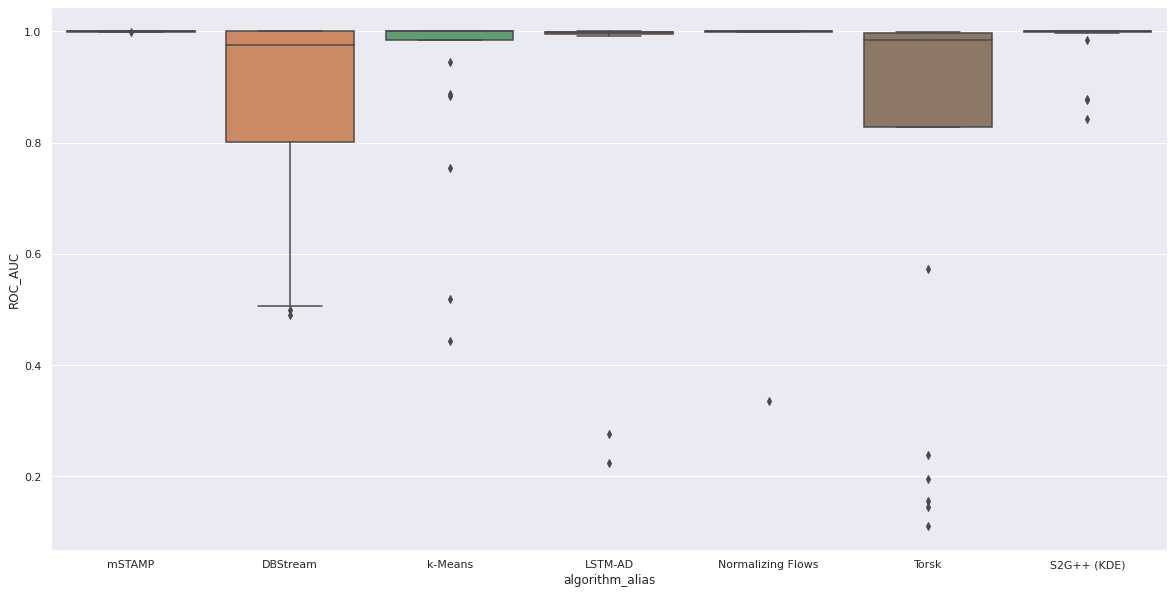

In [13]:
g = sns.boxplot(data=df[df.algorithm_alias.isin(algorithms)], x="algorithm_alias", y="ROC_AUC")

__Export plotting data__

In [14]:
df[df.algorithm_alias.isin(algorithms)].reset_index().pivot_table(index="algorithm", values="ROC_AUC", columns="dataset_name").transpose().to_csv("../data/quality_results.csv")

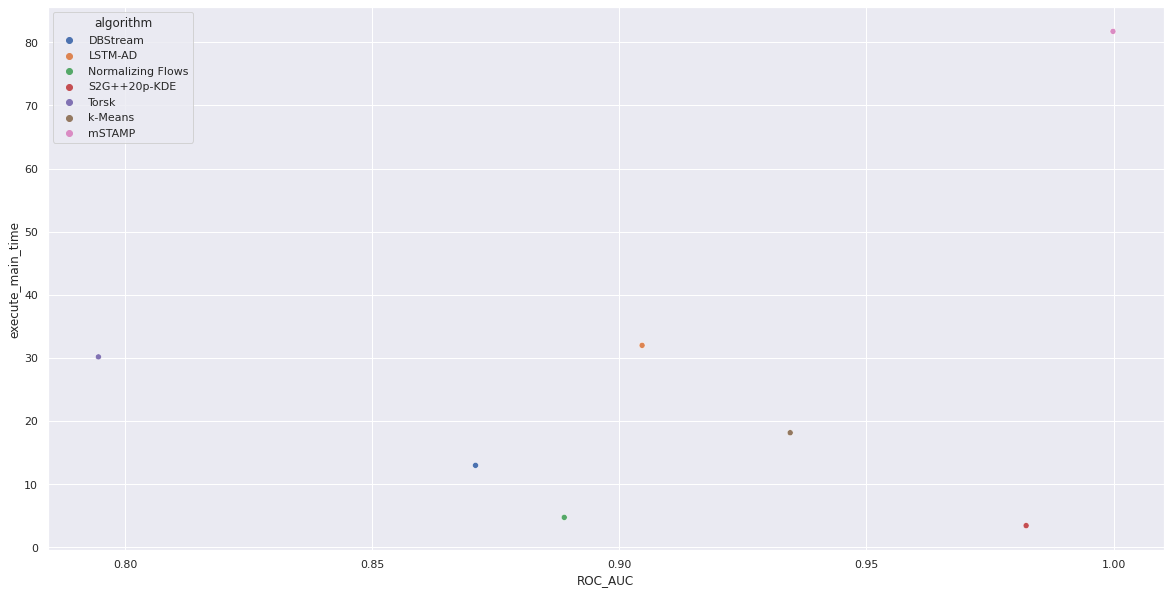

In [15]:
g = sns.scatterplot(data=df[df.algorithm_alias.isin(algorithms)].groupby("algorithm").mean(), x="ROC_AUC", y="execute_main_time", hue="algorithm")

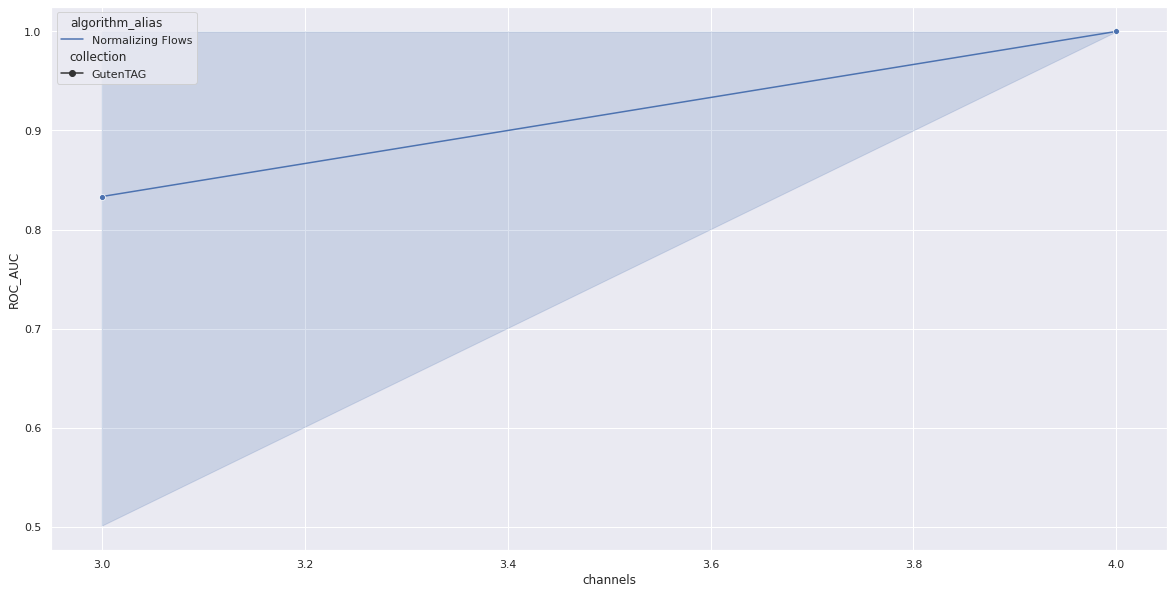

In [18]:
g = sns.lineplot(data=df[df.algorithm_alias.isin(["Normalizing Flows"])], x="channels", y="ROC_AUC", hue="algorithm_alias", style="collection", markers=True)

In [48]:
df.groupby("algorithm_alias")[["status"]].agg(lambda x: x.unique())

,status
algorithm_alias,
DBStream,Status.OK
LSTM-AD,"[Status.OK, Status.ERROR]"
Normalizing Flows,"[Status.TIMEOUT, Status.ERROR, Status.OK]"
S2G++ (KDE),Status.OK
S2G++ (MeanShift),Status.OK
S2G++1p-KDE,Status.OK
S2G++1p-MeanShift,Status.OK
Torsk,Status.OK
k-Means,Status.OK
